# Some techniques to merge tables in Pandas

In [18]:
# Using append() method
'''
append() method is used to add rows of a table. it is similar with union method in SQL
'''
import pandas as pd
a = pd.Series([1,2,3,4,5])
b = pd.Series(["a","b","c"])
a_plusb = a.append(b)
print(a_plusb)

c = pd.DataFrame({"name":["Joni","Zhao","Maulana"],
                 "level":[23,78,54]})
d = pd.DataFrame({"level":[0,29,65],
                 "name":["Zoro","Lucas","Klaus"]})
c_andd = c.append(d)
print(c_andd)

0    1
1    2
2    3
3    4
4    5
0    a
1    b
2    c
dtype: object
      name  level
0     Joni     23
1     Zhao     78
2  Maulana     54
0     Zoro      0
1    Lucas     29
2    Klaus     65


C:\Users\User\AppData\Local\Temp\ipykernel_2740\2018838425.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a_plusb = a.append(b)
C:\Users\User\AppData\Local\Temp\ipykernel_2740\2018838425.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c_andd = c.append(d)


In [19]:
# pd.concat() method
'''
this joining type is supported two techinques those are row-wise dan column-wise
it means we can joining a table to a neW table, of its rows/columns.
'''
import pandas as pd
a = pd.DataFrame({"a":[1,2,3],"b":[4,5,6]})
b = pd.DataFrame({"a":[7,8,9],"b":[10,11,12]})
c = pd.DataFrame({"c":[-1,-2,-3],"d":[-4,-5,-6]})

a_b = pd.concat([a,b],axis=0) # rows
print("a concat b by row:\n",a_b)
a_c = pd.concat([a,c],axis=1) # columns
print("a concat c by column:\n",a_c)
a_c_multi = pd.concat([a,c],keys=["a1","c1"])
print("a concat c by rows formed multiindex:\n",a_c_multi)

a concat b by row:
    a   b
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12
a concat c by column:
    a  b  c  d
0  1  4 -1 -4
1  2  5 -2 -5
2  3  6 -3 -6
a concat c by rows formed multiindex:
         a    b    c    d
a1 0  1.0  4.0  NaN  NaN
   1  2.0  5.0  NaN  NaN
   2  3.0  6.0  NaN  NaN
c1 0  NaN  NaN -1.0 -4.0
   1  NaN  NaN -2.0 -5.0
   2  NaN  NaN -3.0 -6.0


In [20]:
# using pd.merge()
'''
this method is similar with join tables in sql, it has left, right, inner, and outer join method.
'''
a = pd.DataFrame({"Key":["K1","K2","K5"],"Name":["Hiro","Saitama","Sanji"],"Age":[17,21,25]})
b = pd.DataFrame({"Key":["K1","K3","K4"],"Hobby":["Coding","Walking","Cooking"],"girlfriend":["Yes","No","No"]})

left_join = pd.merge(a,b,how="left",on="Key")
print("Left Join :\n",left_join)

right_join = pd.merge(a,b,how="right",on="Key")
print("Right Join :\n",right_join)

inner_join = pd.merge(a,b,how="inner",on="Key")
print("Inner Join :\n",inner_join)

outer_join = pd.merge(a,b,how="outer",on="Key")
print("Outer Join :\n",outer_join)

Left Join :
   Key     Name  Age   Hobby girlfriend
0  K1     Hiro   17  Coding        Yes
1  K2  Saitama   21     NaN        NaN
2  K5    Sanji   25     NaN        NaN
Right Join :
   Key  Name   Age    Hobby girlfriend
0  K1  Hiro  17.0   Coding        Yes
1  K3   NaN   NaN  Walking         No
2  K4   NaN   NaN  Cooking         No
Inner Join :
   Key  Name  Age   Hobby girlfriend
0  K1  Hiro   17  Coding        Yes
Outer Join :
   Key     Name   Age    Hobby girlfriend
0  K1     Hiro  17.0   Coding        Yes
1  K2  Saitama  21.0      NaN        NaN
2  K5    Sanji  25.0      NaN        NaN
3  K3      NaN   NaN  Walking         No
4  K4      NaN   NaN  Cooking         No


In [21]:
# Using pd.merge() part 2
'''
How if we work with multiindex table?
if we find our data is multi-indexed, we have to reset the index first in order to merge them
'''
a = pd.DataFrame({"Key":["K1","K2","K5"],"Name":["Hiro","Saitama","Sanji"],"Age":[17,21,25]}).set_index(["Key","Name"])
b = pd.DataFrame({"Key":["K1","K3","K4"],"Hobby":["Coding","Walking","Cooking"],"girlfriend":["Yes","No","No"]}).set_index(["Key","Hobby"])

a_b = pd.merge(a.reset_index(),b.reset_index(),how="outer",on="Key")
a_b

,Key,Name,Age,Hobby,girlfriend
0,K1,Hiro,17.0,Coding,Yes
1,K2,Saitama,21.0,NaN,NaN
2,K5,Sanji,25.0,NaN,NaN
3,K3,NaN,NaN,Walking,No
4,K4,NaN,NaN,Cooking,No


In [22]:
# using df.join() method
'''
df.join() method is only working if our data have the same index
'''
a = pd.DataFrame({"Key":["K1","K2","K5"],"Name":["Hiro","Saitama","Sanji"],"Age":[17,21,25]}).set_index(["Key"])
b = pd.DataFrame({"Key":["K1","K3","K4"],"Hobby":["Coding","Walking","Cooking"],"girlfriend":["Yes","No","No"]}).set_index(["Key"])

a_b = a.join(b,how="outer") #defaultly it will return left join, but somehow i more like outer join hahaha
a_b

,Name,Age,Hobby,girlfriend
Key,,,,
K1,Hiro,17.0,Coding,Yes
K2,Saitama,21.0,NaN,NaN
K3,NaN,NaN,Walking,No
K4,NaN,NaN,Cooking,No
K5,Sanji,25.0,NaN,NaN


# Pivot, Melt, Stack, and Unstack

In [23]:
# Prepare the dataset
import pandas as pd
df = pd.DataFrame({"Class":6*["A"]+6*["B"],
                  "Subclass":2*["A1"]+2*["A2"]+2*["A3"]+2*["B1"]+2*["B2"]+2*["B3"],
                  "Subject":6*["Python","Statistics"],
                  "Grade":[92,92,91,94,93,98,90,89,85,92,99,87]},
                 columns=["Class","Subclass","Subject","Grade"])


# Search for unique values of every column
for i in df.columns :
    print(i,"=",df[i].unique())

Class = ['A' 'B']
Subclass = ['A1' 'A2' 'A3' 'B1' 'B2' 'B3']
Subject = ['Python' 'Statistics']
Grade = [92 91 94 93 98 90 89 85 99 87]


In [24]:
# Pivot

# Method 1 : Define the index, columns, and values
pivot1 = df.pivot(index="Subclass",columns="Subject",values="Grade")
#pivot1

# Method 2 : Just define the index and the columns
pivot2 = df.pivot(index="Subclass",columns="Subject")
pivot2

Class             Grade           
Subject  Python Statistics Python Statistics
Subclass                                    
A1            A          A     92         92
A2            A          A     91         94
A3            A          A     93         98
B1            B          B     90         89
B2            B          B     85         92
B3            B          B     99         87

In [25]:
# Pivotting the duplicated index

# Search for the grades sum of every class
pivot = df.pivot_table(index="Class",columns="Subject",values="Grade",aggfunc=sum)
print(pivot)

# Search for the grades mean of every class
pivot = df.pivot_table(index="Class",columns="Subject",values="Grade",aggfunc="mean")
print(pivot)

# Search for the grades median of every class
pivot = df.pivot_table(index="Class",columns="Subject",values="Grade",aggfunc="median")
print(pivot)

Subject  Python  Statistics
Class                      
A           276         284
B           274         268
Subject     Python  Statistics
Class                         
A        92.000000   94.666667
B        91.333333   89.333333
Subject  Python  Statistics
Class                      
A            92          94
B            90          89


In [26]:
# Melt
'''
Melt is a process where you restore your pivotted table to the first form
'''
pivot_data = df.pivot_table(index="Class",columns="Subject",values="Grade",aggfunc="mean").reset_index()
print("Pivot_data:\n",pivot_data)

# Method 1 : default
melt_data1 = pd.melt(pivot_data)
print("Melted data :\n",melt_data1)

# Method 2 : set the id_vars as a keyword argument
melt_data2 = pd.melt(pivot_data,id_vars='Class')
print("Melted data 2 : \n",melt_data2)

Pivot_data:
 Subject Class     Python  Statistics
0           A  92.000000   94.666667
1           B  91.333333   89.333333
Melted data :
       Subject      value
0       Class          A
1       Class          B
2      Python       92.0
3      Python  91.333333
4  Statistics  94.666667
5  Statistics  89.333333
Melted data 2 : 
   Class     Subject      value
0     A      Python  92.000000
1     B      Python  91.333333
2     A  Statistics  94.666667
3     B  Statistics  89.333333


In [27]:
# Melt

# Method 3 
melt3 = pd.melt(pivot_data,value_vars="Subject")
print(melt3)

# Method 4
melt4 = pd.melt(pivot_data,id_vars="Class",value_vars=["Python","Statistics"],value_name="Grade")
print(melt4)

      Subject      value
0  Statistics  94.666667
1  Statistics  89.333333
  Class     Subject      Grade
0     A      Python  92.000000
1     B      Python  91.333333
2     A  Statistics  94.666667
3     B  Statistics  89.333333


In [28]:
# Unstack
'''
Unstack is likely the same with pivot method. But, here we have to define the index first
'''
import pandas as pd
df = pd.DataFrame({"Class":6*["A"]+6*["B"],
                  "Subclass":2*["A1"]+2*["A2"]+2*["A3"]+2*["B1"]+2*["B2"]+2*["B3"],
                  "Subject":6*["Python","Statistics"],
                  "Grade":[92,92,91,94,93,98,90,89,85,92,99,87]},
                 columns=["Class","Subclass","Subject","Grade"])
df = df.set_index(["Class","Subclass","Subject"])
unstacked1 = df.unstack()
print("data :\n",df)
print("unstacked1 :\n",unstacked1)

# unstack with defining the level
unstacked2 = df.unstack(level="Class")
print("unstacked2 : \n",unstacked2)

unstacked3 = df.unstack(level=2) # it means that we make the third coloumn to unstack
print("unstacked3:\n",unstacked3)

data :
                            Grade
Class Subclass Subject          
A     A1       Python         92
               Statistics     92
      A2       Python         91
               Statistics     94
      A3       Python         93
               Statistics     98
B     B1       Python         90
               Statistics     89
      B2       Python         85
               Statistics     92
      B3       Python         99
               Statistics     87
unstacked1 :
                 Grade           
Subject        Python Statistics
Class Subclass                  
A     A1           92         92
      A2           91         94
      A3           93         98
B     B1           90         89
      B2           85         92
      B3           99         87
unstacked2 : 
                     Grade      
Class                   A     B
Subclass Subject               
A1       Python      92.0   NaN
         Statistics  92.0   NaN
A2       Python      91.0   NaN
         Sta

In [29]:
# Stacking
'''
Stacking is just like melt method
it makes the unstacked data be stacked
'''
unstacked2 = df.unstack(level="Class")
print("unstacked2 : \n",unstacked2)
stacked = unstacked2.stack()
print("stacked unstack data :\n",stacked)

#swapping the index position
stacked = stacked.swaplevel(0,2)
stacked = stacked.swaplevel(1,2)
print("New stacked data:\n",stacked)

#sorting the index
stacked = stacked.sort_index()
print("New stacked data:\n",stacked)

unstacked2 : 
                     Grade      
Class                   A     B
Subclass Subject               
A1       Python      92.0   NaN
         Statistics  92.0   NaN
A2       Python      91.0   NaN
         Statistics  94.0   NaN
A3       Python      93.0   NaN
         Statistics  98.0   NaN
B1       Python       NaN  90.0
         Statistics   NaN  89.0
B2       Python       NaN  85.0
         Statistics   NaN  92.0
B3       Python       NaN  99.0
         Statistics   NaN  87.0
stacked unstack data :
                            Grade
Subclass Subject    Class       
A1       Python     A       92.0
         Statistics A       92.0
A2       Python     A       91.0
         Statistics A       94.0
A3       Python     A       93.0
         Statistics A       98.0
B1       Python     B       90.0
         Statistics B       89.0
B2       Python     B       85.0
         Statistics B       92.0
B3       Python     B       99.0
         Statistics B       87.0
New stacked data:
 

# AGGREGATION

In [30]:
# Data Inspection : Global Air Quality
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv")
print(data.head(5))
print(100*"-")
print(data.info())
print(100*"-")
print(data.describe())
print(100*"-")
# Count the data
print(data.count())
print(100*"-")

# count the data, but group the data first
data_grouped = data.groupby("source_name").count()
data_grouped.head()

                          location       city country pollutant  value  \
0                  MOBILE-KICKAPOO    LINCOLN      US      pm10   7.00   
1                  Oxford St Ebbes     Oxford      GB       no2  30.00   
2                 BROADWAY (South)  St. Louis      US      pm25   6.10   
3  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN      pm25  23.67   
4                        Manglerud       Oslo      NO      pm10  27.06   

                 timestamp   unit source_name   latitude  longitude  \
0  2017-01-18 16:00:00 UTC  µg/m³      AirNow  35.488400 -97.090280   
1  2020-04-07 20:00:00 UTC  µg/m³       DEFRA  51.744804  -1.260278   
2  2020-04-07 19:00:00 UTC  µg/m³      AirNow  38.542500 -90.263610   
3  2020-04-07 18:30:00 UTC  µg/m³       caaqm  23.864016  78.802895   
4  2020-04-07 20:00:00 UTC  µg/m³      Norway  59.898690  10.814950   

   averaged_over_in_hours  
0                    1.00  
1                    1.00  
2                    1.00  
3               

,location,city,country,pollutant,value,timestamp,unit,latitude,longitude,averaged_over_in_hours
source_name,,,,,,,,,,
ARPALAZIO,72,72,72,72,72,72,72,72,72,72
Agaar.mn,27,27,27,27,27,27,27,27,27,0
AirNow,1712,1681,1715,1715,1715,1715,1715,1715,1715,1715
Andalucia,71,71,71,71,71,71,71,71,71,71
Anqing,4,4,4,4,4,4,4,4,4,4


In [31]:
# Groupby and aggregate with a simple statistical method
'''
Our purpose here is to analyze the mean,standard deviation, 
n unique, and the sum of the pollution rate between countries
'''
data1 = data[["city","country","pollutant","value"]]
data1 = data1.pivot_table(index=["city","country"],columns="pollutant").fillna(0)
mean_aggregated = data1.groupby("country").agg("mean")
print("The mean of the pollution rate:\n",mean_aggregated.head())
print(100*"-")
std_aggregated = data1.groupby("country").std()
print("The standard deviation of the pollution rate:\n",std_aggregated.head())
print(100*"-")
unique_aggregated = data1.groupby("country").nunique()
print("The sum of the pollution rate:\n",unique_aggregated.head())
print(100*"-")
sum_aggregated = data1.groupby("country").sum()
print("The sum of the pollution rate:\n",sum_aggregated.head())

The mean of the pollution rate:
               value                                                           \
pollutant        bc           co        no2         o3       pm10       pm25   
country                                                                        
IN         0.000000   355.537529   5.702424  13.717442  43.289545  33.253647   
US         0.523293     0.069514   0.000823   0.022993   3.049226   3.371110   
CA         0.000000     0.036818   0.000355   0.025963   0.836364   3.433601   
GB         0.000000     0.000000  11.102976  32.542857   6.842857   3.921429   
TR         0.000000 -8421.346491  15.423977  20.361711  25.942544   0.000000   

                      
pollutant        so2  
country               
IN         16.122299  
US          0.000100  
CA          0.000091  
GB          0.538095  
TR          7.138158  
----------------------------------------------------------------------------------------------------
The standard deviation of the pollution r

In [32]:
# Because i think the last note has many results, i will expand the next here :D
'''
Our purpose is to analyze the minimal and maximal value of the pollution rate between countries
'''
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv")
data = data[["country","city","pollutant","value"]].pivot_table(index=["country","city"],columns="pollutant").fillna(0)
min_aggregated = data.groupby("country").min()
print(min_aggregated.head(5))
print(100*"-")
max_aggregated = data.groupby("country").max()
print(max_aggregated.head(5))

          value                                
pollutant    bc   co   no2   o3 pm10  pm25  so2
country                                        
AR          0.0  0.0   0.0  0.0  0.0  18.1  0.0
AU          0.0  0.0   0.0  0.0  0.0   3.9  0.0
BA          0.0  0.0   0.0  0.0  0.0   0.0  0.0
CA          0.0  0.0   0.0  0.0  0.0   0.0  0.0
CL          0.0  0.0  21.0  0.0  0.0   0.0  0.0
----------------------------------------------------------------------------------------------------
          value                                                   
pollutant    bc        co      no2         o3   pm10  pm25     so2
country                                                           
AR          0.0     0.000   0.0000   0.000000    0.0  18.1   0.000
AU          0.0     0.000   0.0000   0.000000    0.0   3.9   0.000
BA          0.0  1508.000  32.0000  21.000000  100.0   0.0  78.000
CA          0.0     0.285   0.0024   0.048333    5.2   6.0   0.001
CL          0.0     0.000  21.0000   0.000000 

In [33]:
# Multiple Aggregation
'''
So we can use multiple function while groupby-ing data
but it seems more complex, still it is powerful
here, our purpose is to find the std,mean, and median of the data grouped by country
'''
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv")
data = data[["country","city","pollutant","value"]].pivot_table(index=["country","city"],columns="pollutant").fillna(0)
multiple_agg = data.groupby("country").agg(["std","mean","median"])
multiple_agg.head()

value                                                        \
pollutant    bc                      co                           no2   
            std mean median         std        mean median        std   
country                                                                 
AR          NaN  0.0    0.0         NaN    0.000000    0.0        NaN   
AU          NaN  0.0    0.0         NaN    0.000000    0.0        NaN   
BA          0.0  0.0    0.0  536.925476  475.833333  355.0  11.945711   
CA          0.0  0.0    0.0    0.089841    0.036818    0.0   0.000750   
CL          NaN  0.0    0.0         NaN    0.000000    0.0        NaN   

                                       ...                                  \
pollutant                          o3  ...                 pm10              
                mean median       std  ...    median        std       mean   
country                                ...                                   
AR          0.000000    0.0       NaN  ...  0.000000        NaN   0.000000   
AU          0.000000    0.0       NaN  ...  0.000000        NaN   0.000000   
BA         19.500000   22.0  8.207720  ...  3.000000  46.701891  40.333333   
CA          0.000355    0.0  0.019323  ...  0.035455   1.713052   0.836364   
CL         21.000000   21.0       NaN  ...  0.000000        NaN   0.000000   

                                                                           
pollutant             pm25                          so2                    
          median       std       mean median        std       mean median  
country                                                                    
AR           0.0       NaN  18.100000   18.1        NaN   0.000000    0.0  
AU           0.0       NaN   3.900000    3.9        NaN   0.000000    0.0  
BA          23.0  0.000000   0.000000    0.0  30.403947  18.000000    5.5  
CA           0.0  2.286509   3.433601    4.0   0.000302   0.000091    0.0  
CL           0.0       NaN   0.000000    0.0        NaN   0.000000    0.0  

[5 rows x 21 columns]

In [34]:
# Aggregation with custom function
'''
Our purpose here is to make a function and then deploy that to aggregate our data
'''
def IQR(series) :
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    return Q3 - Q1
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv")
data = data[["country","city","pollutant","value"]].pivot_table(index=["country","city"],columns="pollutant").fillna(0)
iqr_agg = data.groupby("country").agg(IQR)
iqr_agg.head()

value                                                  
pollutant    bc      co       no2        o3  pm10      pm25   so2
country                                                          
AR          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
AU          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
BA          0.0  297.75  14.25000  7.500000  79.0  0.000000  17.0
CA          0.0    0.00   0.00025  0.035708   0.5  3.876471   0.0
CL          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0

In [35]:
# Custom Aggregation by Dict
'''
our purpose here is to find the mean of o3 and the std of pm10 pollutant by country
'''
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv")
data = data[["country","city","pollutant","value"]].pivot_table(index=["country","city"],columns="pollutant").fillna(0)
custom_agg = data["value"][["o3","pm10"]].groupby("country").agg({
    "o3":"mean",
    "pm10":"std"
})
custom_agg.head()

pollutant,o3,pm10
country,,
AR,0.000000,NaN
AU,0.000000,NaN
BA,5.833333,46.701891
CA,0.025963,1.713052
CL,0.000000,NaN


# TIME SERIES IN PANDAS

In [36]:
# Load dataset with time column
import pandas as pd
'''
A standard format for time series according to ISO 8601 is : YYYY-mm-dd HH:MM:SS
'''
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv",
                   parse_dates=True,index_col="timestamp")
print("Top 5 data:\n",data.head())
data.info()

Top 5 data:
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-07 18:30:00+00:00      pm25  23

In [37]:
# Convert a column to datetime type
'''
In case we already loaded our data without assigning our datetime index, we still can change it later
'''
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv")
data["timestamp"] = pd.to_datetime(data["timestamp"])
data = data.set_index("timestamp")
data.head()

,location,city,country,pollutant,value,unit,source_name,latitude,longitude,averaged_over_in_hours
timestamp,,,,,,,,,,
2017-01-18 16:00:00+00:00,MOBILE-KICKAPOO,LINCOLN,US,pm10,7.00,µg/m³,AirNow,35.488400,-97.090280,1.00
2020-04-07 20:00:00+00:00,Oxford St Ebbes,Oxford,GB,no2,30.00,µg/m³,DEFRA,51.744804,-1.260278,1.00
2020-04-07 19:00:00+00:00,BROADWAY (South),St. Louis,US,pm25,6.10,µg/m³,AirNow,38.542500,-90.263610,1.00
2020-04-07 18:30:00+00:00,"Deen Dayal Nagar, Sagar - MPPCB",Sagar,IN,pm25,23.67,µg/m³,caaqm,23.864016,78.802895,0.25
2020-04-07 20:00:00+00:00,Manglerud,Oslo,NO,pm10,27.06,µg/m³,Norway,59.898690,10.814950,1.00


In [38]:
# Resampling
'''
Resampling is a process where we change the detail of our datetime column, so that we can perform our statistical
method clearly.
Upsampling = we give less details (ex. D -> M)
Downsampling = we give more details (ex. D -> H)
Here is the argument for the function data.resample()
'Min', 'T' : minute
'H' : hour
'D' : day
'B' : Business day
'W' : week
'M' : month
'Q' :quarter
'A' :year
'''
# We already got our datetimed data
print("datetime data :\n",data.head())

datetime data :
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-07 18:30:00+00:00      pm25

In [39]:
# Upsampling
'''
Our purpose here is to find the sum of value, latitude, and longitude of each time per month
'''
data_needed = data[["value","latitude","longitude"]]
data_needed = data_needed.fillna(0).resample("M").sum()
data_needed.head()

,value,latitude,longitude
timestamp,,,
2014-05-31 00:00:00+00:00,9.7,14.635,121.080
2014-06-30 00:00:00+00:00,0.0,0.000,0.000
2014-07-31 00:00:00+00:00,0.0,0.000,0.000
2014-08-31 00:00:00+00:00,7.1,37.132,-86.148
2014-09-30 00:00:00+00:00,0.0,0.000,0.000


In [40]:
# Downsampling
'''
Our purpose here is to find the mean of value, lattitude, and longitude of each time per hour
'''
data_needed = data[["value","latitude","longitude"]]
data_needed = data_needed.fillna(0).resample("H").mean()
data_needed = data_needed.fillna(0)
data_needed.head()

,value,latitude,longitude
timestamp,,,
2014-05-13 03:00:00+00:00,9.7,14.635,121.08
2014-05-13 04:00:00+00:00,0.0,0.000,0.00
2014-05-13 05:00:00+00:00,0.0,0.000,0.00
2014-05-13 06:00:00+00:00,0.0,0.000,0.00
2014-05-13 07:00:00+00:00,0.0,0.000,0.00


In [41]:
# Resample by frequency
'''
We can resample datetime series by frequency, ex. every 2 hours, every 2 weeks, etc.
'''

# Upsampling
'''
Our purpose here is to find the median of each time per 3 weeks
'''
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv")
data["timestamp"] = pd.to_datetime(data["timestamp"])
data = data.set_index("timestamp")
data_needed = data[["value","latitude","longitude"]]
upsampled  = data_needed.resample("3W").median().fillna(method="ffill") # ffill = fill it with the previous row value
print(upsampled.head())
print(100*"-")
# Downsampling
'''
Our purpose here is to find the mean of each time per 6 hours
'''
downsampled = data_needed.resample("6H").mean().fillna(method="bfill") # bfill = fill it with the next column value
print(downsampled.head())

                           value  latitude  longitude
timestamp                                            
2014-05-18 00:00:00+00:00    9.7    14.635     121.08
2014-06-08 00:00:00+00:00    9.7    14.635     121.08
2014-06-29 00:00:00+00:00    9.7    14.635     121.08
2014-07-20 00:00:00+00:00    9.7    14.635     121.08
2014-08-10 00:00:00+00:00    9.7    14.635     121.08
----------------------------------------------------------------------------------------------------
                           value  latitude  longitude
timestamp                                            
2014-05-13 00:00:00+00:00    9.7    14.635    121.080
2014-05-13 06:00:00+00:00    7.1    37.132    -86.148
2014-05-13 12:00:00+00:00    7.1    37.132    -86.148
2014-05-13 18:00:00+00:00    7.1    37.132    -86.148
2014-05-14 00:00:00+00:00    7.1    37.132    -86.148


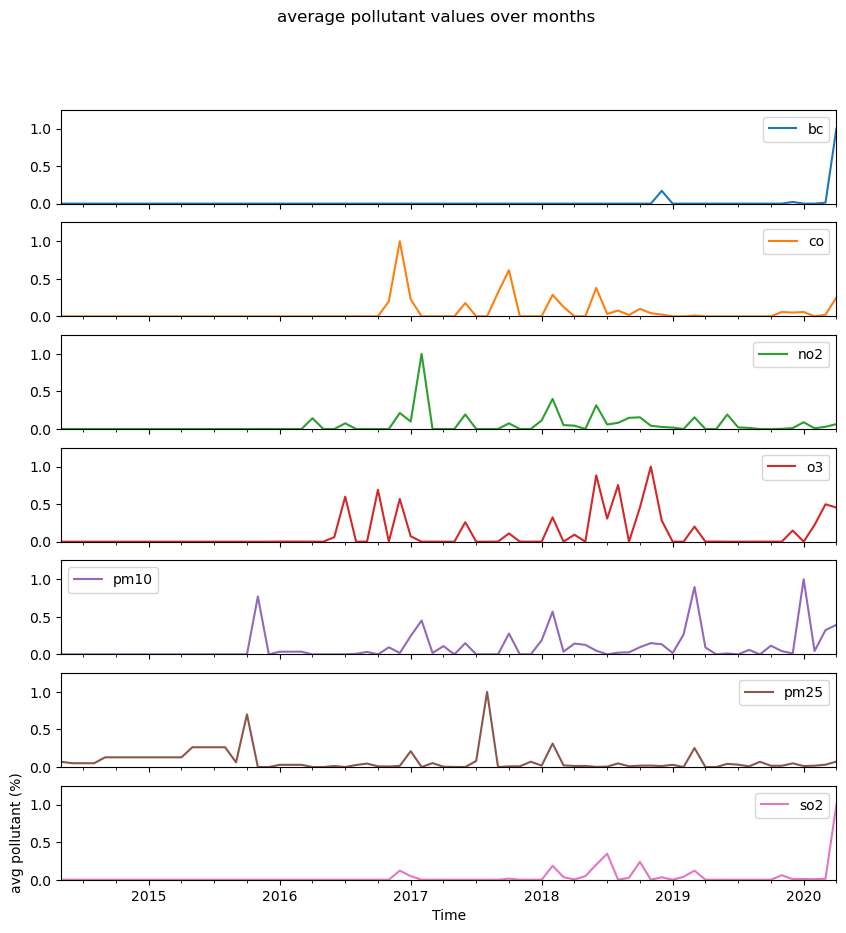

In [42]:
# Mini Project : Visualization
import pandas as pd
import matplotlib.pyplot as plt
'''
Our purpose here is to visualize average pollutant value over months
'''
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv")
data["timestamp"] = pd.to_datetime(data["timestamp"])
data = data.set_index(["timestamp","pollutant"])
data = data.pivot_table(index="timestamp",columns="pollutant",values="value",aggfunc="mean").fillna(0)

# make the function that change the negative values to 0
def zeros(value) :
    if value < 0 :
        value = 0
    return value

data = data.resample("M").mean().fillna(method="bfill").applymap(lambda x : zeros(x)).apply(lambda x : x/max(x))
data.plot(
figsize = (10,10),
    title = "average pollutant values over months",
    ylim = (0,1.25),
    subplots=True
)
plt.ylabel("avg pollutant (%)")
plt.xlabel("Time")
plt.show()

# STUDY CASE PROJECT : Sales Performance on Every Branch

Our purpose here is to visualize the sales performance on every branch with the given data

In [46]:
import pandas as pd

# Firstly we have to load and identify our data first
data1 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv")
data2 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv")
data3 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv")
data4 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv")

# Let's see how the data is
print("Data 1 :\n",data1)
print("Data 2 :\n",data2)
print("Data 3 :\n",data3)
print("Data 4 :\n",data4)

print(100*"-")
# Descriptive analysis
print("Data 1 :\n",data1.describe())
print("Data 2 :\n",data2.describe())
print("Data 3 :\n",data3.describe())
print("Data 4 :\n",data4.describe())

# Merge all of the data using concat()
data = pd.concat([data1,data2,data3,data4],axis=0)
print("Total row :".data.shape[0])

Data 1 :
       order_id order_date  customer_id             city     province  \
0      1612885   01-01-19        16293           Malang   Jawa Timur   
1      1612387   01-01-19        17228            Bogor   Jawa Barat   
2      1612903   01-01-19        16775        Surakarta  Jawa Tengah   
3      1612963   01-01-19            0          unknown      unknown   
4      1612915   01-01-19            0          unknown      unknown   
...        ...        ...          ...              ...          ...   
9484   1637008   31-03-19        17243    Jakarta Pusat  DKI Jakarta   
9485   1637050   31-03-19        14903    Jakarta Timur  DKI Jakarta   
9486   1637104   31-03-19        17107  Jakarta Selatan  DKI Jakarta   
9487   1637086   31-03-19        17050            Bogor   Jawa Barat   
9488   1637089   31-03-19        15696    Jakarta Timur  DKI Jakarta   

     product_id    brand  quantity  item_price  total_price  
0         P1301  BRAND_F         6      747000      4482000  
1

AttributeError: 'str' object has no attribute 'data'

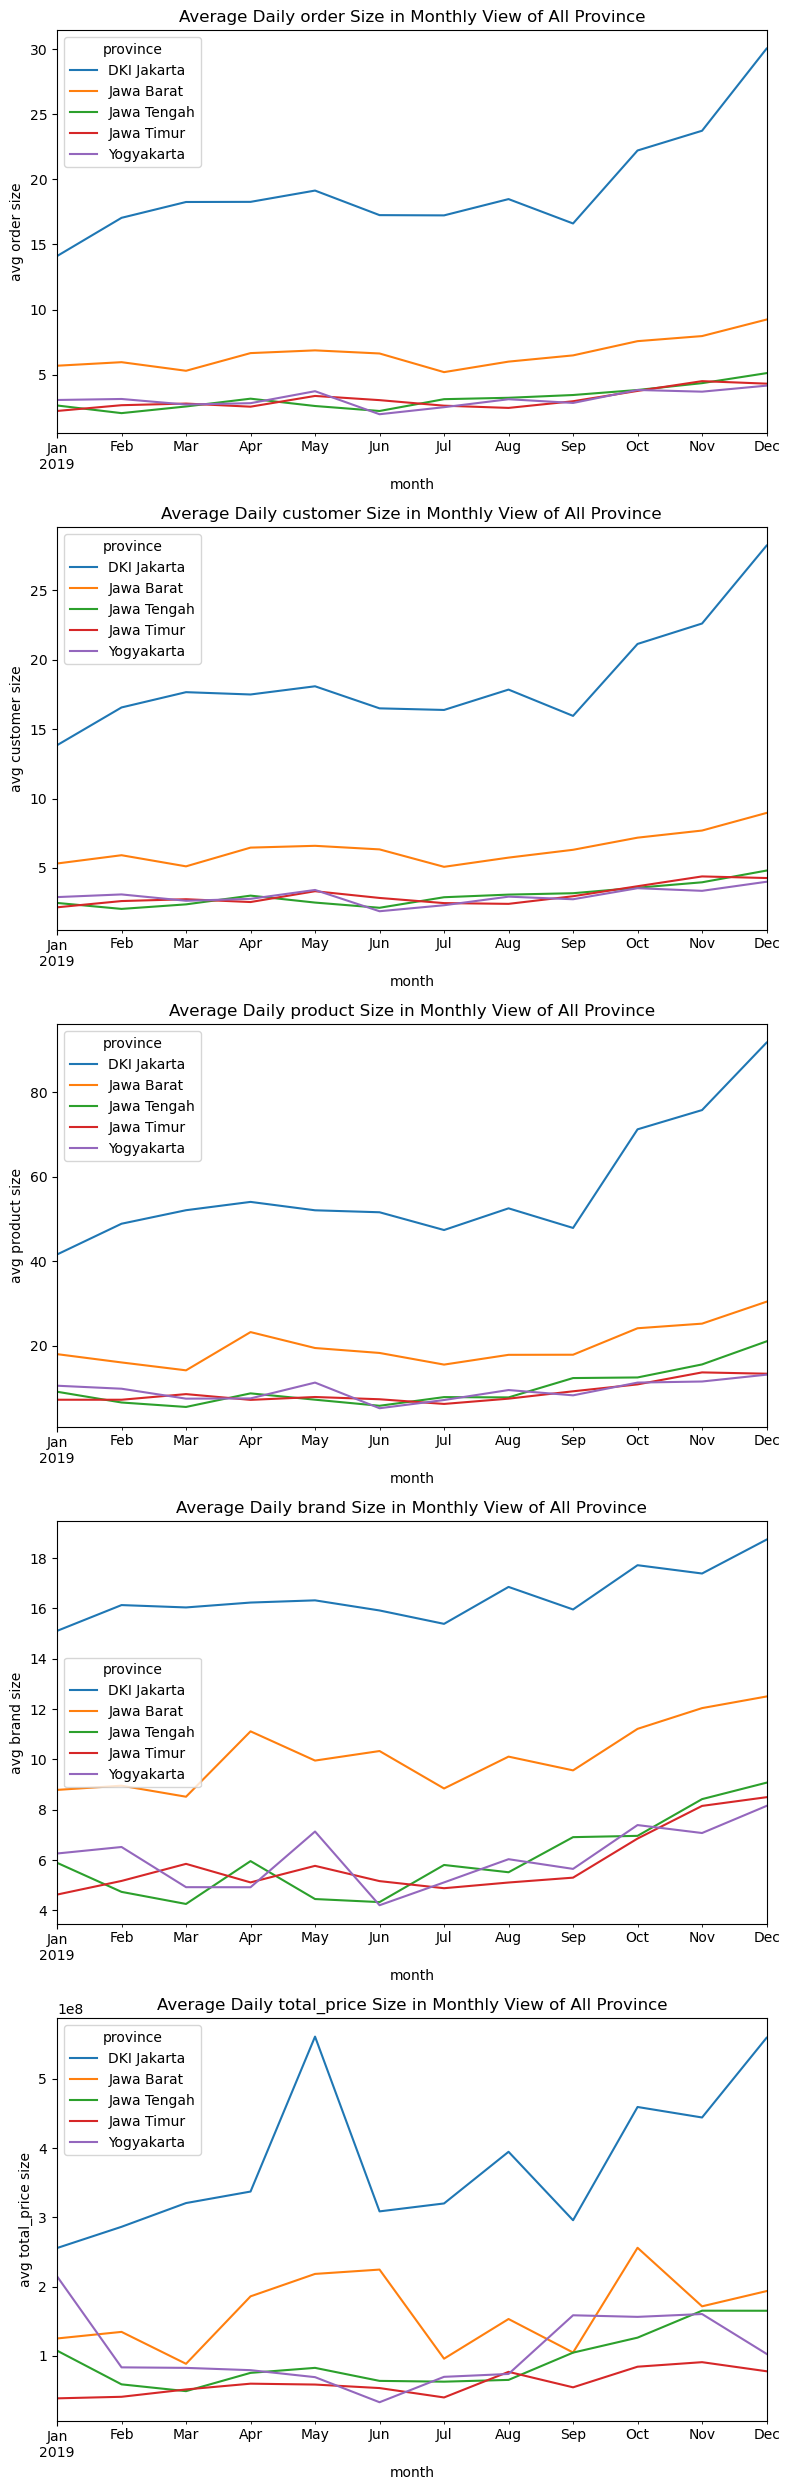

In [47]:
# Clean the data
province_needed = ["DKI Jakarta","Jawa Tengah","Jawa Barat","Jawa Timur","Yogyakarta"]
data = data.loc[(data["customer_id"]!=0) & (data["province"].isin(province_needed))]
#data.head(10)
#data.loc[(data["item_price"]<0)|(data["total_price"]<0)] check if there is another wrong data
data = data.loc[(data["total_price"]>0)]

# Change the data type of order_date
data["order_date"] = pd.to_datetime(data["order_date"])

# Group the data by order_date and order_id
data = data.groupby(["order_date","province"]).agg({
    "order_id" : "nunique",
    "customer_id" : "nunique",
    "product_id" : 'nunique',
    "brand" : "nunique",
    "total_price" : "sum"
})
#data

# Change the column name
data.columns = ["order","customer","product","brand","total_price"]
#data.head(5)

data_unstack = data.unstack("province").fillna(0)
idx = pd.IndexSlice
#data_by_order = data.loc[:,idx["order"]]
#data_by_order = data_by_order.resample("M").sum()
#data_by_order.plot()

# Plotting all of the value
fig, axes = plt.subplots(5,1,figsize=(8,25))
for i, col in enumerate(data.columns) :
    data2 = data_unstack.loc[:,idx[col]]
    data2 = data2.resample("M").mean()
    data2.plot(
        title = "Average Daily " + col + " Size in Monthly View of All Province",
        ax = axes[i])
    axes[i].set_ylabel("avg " + col + " size")
    axes[i].set_xlabel("month")
plt.tight_layout()
plt.show()

Learning Source : www.dqlab.id